<a href="https://colab.research.google.com/github/dmschoi/ai-week-2/blob/main/chapter05_fundamentals_of_ml_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [28]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [29]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.6284 - accuracy: 0.8082 - val_loss: 0.3437 - val_accuracy: 0.8998
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2619 - accuracy: 0.9181 - val_loss: 0.2452 - val_accuracy: 0.9259
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1691 - accuracy: 0.9481 - val_loss: 0.1763 - val_accuracy: 0.9463
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1228 - accuracy: 0.9622 - val_loss: 0.1293 - val_accuracy: 0.9616
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0897 - accuracy: 0.9729 - val_loss: 0.1233 - val_accuracy: 0.9642
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0658 - accuracy: 0.9789 - val_loss: 0.1144 - val_accuracy: 0.9678
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0496 - accuracy: 0.9845 - val_loss: 0.1288 - val_accuracy: 0.9635
Epoch 

In [25]:
model3 = get_model()
history_original = model3.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.2954 - accuracy: 0.9159 - val_loss: 0.1557 - val_accuracy: 0.9535
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1213 - accuracy: 0.9646 - val_loss: 0.1121 - val_accuracy: 0.9659
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0796 - accuracy: 0.9771 - val_loss: 0.1010 - val_accuracy: 0.9706
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0570 - accuracy: 0.9825 - val_loss: 0.0812 - val_accuracy: 0.9746
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0424 - accuracy: 0.9873 - val_loss: 0.0810 - val_accuracy: 0.9753
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0320 - accuracy: 0.9910 - val_loss: 0.0762 - val_accuracy: 0.9777
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0244 - accuracy: 0.9932 - val_loss: 0.0801 - val_accuracy: 0.9764
Epoch 

**Plotting a validation accuracy comparison**

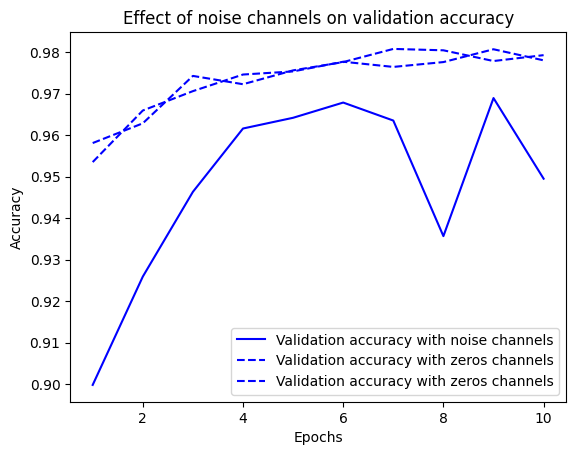

In [27]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3159 - accuracy: 0.1024 - val_loss: 2.3055 - val_accuracy: 0.1037
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2999 - accuracy: 0.1151 - val_loss: 2.3077 - val_accuracy: 0.1107
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2915 - accuracy: 0.1287 - val_loss: 2.3151 - val_accuracy: 0.1083
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2805 - accuracy: 0.1379 - val_loss: 2.3286 - val_accuracy: 0.1076
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2646 - accuracy: 0.1526 - val_loss: 2.3337 - val_accuracy: 0.1037
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2445 - accuracy: 0.1679 - val_loss: 2.3491 - val_accuracy: 0.0995
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2215 - accuracy: 0.1814 - val_loss: 2.3562 - val_accuracy: 0.1028

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 662.1756 - accuracy: 0.3509 - val_loss: 2.1251 - val_accuracy: 0.2574
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.8996 - accuracy: 0.2464 - val_loss: 2.2086 - val_accuracy: 0.2062
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 3.3625 - accuracy: 0.2152 - val_loss: 2.1217 - val_accuracy: 0.2157
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6127 - accuracy: 0.2115 - val_loss: 2.2165 - val_accuracy: 0.2005
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4142 - accuracy: 0.1999 - val_loss: 2.3976 - val_accuracy: 0.1126
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 3.5573 - accuracy: 0.1778 - val_loss: 2.1885 - val_accuracy: 0.2091
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3495 - accuracy: 0.1981 - val_loss: 2.1916 - val_accuracy: 0.2003
Epoc

In [32]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(0.01),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

#rmsporp 괄호 안의 수를 0.01로 바꾸니까 accuracy가 올라감감

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3454 - accuracy: 0.9140 - val_loss: 0.1321 - val_accuracy: 0.9636
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1277 - accuracy: 0.9645 - val_loss: 0.1554 - val_accuracy: 0.9619
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1018 - accuracy: 0.9734 - val_loss: 0.1732 - val_accuracy: 0.9627
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0811 - accuracy: 0.9783 - val_loss: 0.1580 - val_accuracy: 0.9699
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0689 - accuracy: 0.9827 - val_loss: 0.1973 - val_accuracy: 0.9672
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0586 - accuracy: 0.9855 - val_loss: 0.1728 - val_accuracy: 0.9718
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0523 - accuracy: 0.9872 - val_loss: 0.1815 - val_accuracy: 0.9737
Epoch 

**The same model with a more appropriate learning rate**

In [33]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)
history_model = model.fit(
    train_images, train_labels, 
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3270 - accuracy: 0.9125 - val_loss: 0.1354 - val_accuracy: 0.9618
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1280 - accuracy: 0.9650 - val_loss: 0.1424 - val_accuracy: 0.9655
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0988 - accuracy: 0.9736 - val_loss: 0.1451 - val_accuracy: 0.9688
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0831 - accuracy: 0.9788 - val_loss: 0.1597 - val_accuracy: 0.9700
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0713 - accuracy: 0.9819 - val_loss: 0.1787 - val_accuracy: 0.9701
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0657 - accuracy: 0.9843 - val_loss: 0.1632 - val_accuracy: 0.9754
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0546 - accuracy: 0.9871 - val_loss: 0.2010 - val_accuracy: 0.9699
Epoch 

In [36]:
import matplotlib.pyplot as plt
val_small_loss = history_small_model.history["val_loss"]
val_large_loss = history_large_model.history["val_loss"]
val_original_loss = history_original_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_small_loss, "b--",
         label="Validation small loss")
plt.plot(epochs, val_large_loss, "b--",
         label="Validation large loss")
plt.plot(epochs, val_original_loss, "b--",
         label="Validation original loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

NameError: ignored

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [34]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6603 - accuracy: 0.8384 - val_loss: 0.3602 - val_accuracy: 0.9028
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3543 - accuracy: 0.9024 - val_loss: 0.3105 - val_accuracy: 0.9137
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3189 - accuracy: 0.9108 - val_loss: 0.2935 - val_accuracy: 0.9188
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3025 - accuracy: 0.9157 - val_loss: 0.2848 - val_accuracy: 0.9212
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2928 - accuracy: 0.9178 - val_loss: 0.2786 - val_accuracy: 0.9241
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2857 - accuracy: 0.9204 - val_loss: 0.2785 - val_accuracy: 0.9245
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2811 - accuracy: 0.9219 - val_loss: 0.2722 - val_accuracy: 0.9268
Epoch 

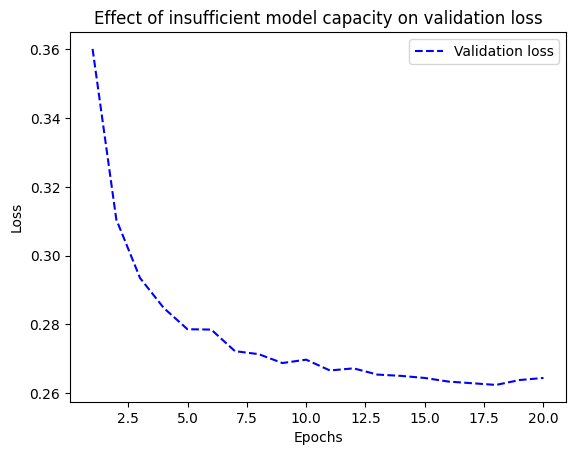

In [35]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 0.3772 - accuracy: 0.8925 - val_loss: 0.1979 - val_accuracy: 0.9429
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1675 - accuracy: 0.9500 - val_loss: 0.1468 - val_accuracy: 0.9577
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1160 - accuracy: 0.9650 - val_loss: 0.1176 - val_accuracy: 0.9658
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0885 - accuracy: 0.9731 - val_loss: 0.1120 - val_accuracy: 0.9663
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9785 - val_loss: 0.0956 - val_accuracy: 0.9703
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0571 - accuracy: 0.9828 - val_loss: 0.1157 - val_accuracy: 0.9666
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0482 - accuracy: 0.9851 - val_loss: 0.0920 - val_accuracy: 0.9735
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 2s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 56ms/step - loss: 0.5464 - accuracy: 0.7796 - val_loss: 0.4305 - val_accuracy: 0.8421
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3482 - accuracy: 0.8905 - val_loss: 0.3263 - val_accuracy: 0.8826
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2631 - accuracy: 0.9122 - val_loss: 0.2933 - val_accuracy: 0.8887
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2144 - accuracy: 0.9275 - val_loss: 0.2778 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1790 - accuracy: 0.9422 - val_loss: 0.2963 - val_accuracy: 0.8797
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1545 - accuracy: 0.9504 - val_loss: 0.2780 - val_accuracy: 0.8898
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1324 - accurac

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.6395 - accuracy: 0.6910 - val_loss: 0.5623 - val_accuracy: 0.8375
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5071 - accuracy: 0.8599 - val_loss: 0.4691 - val_accuracy: 0.8606
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4174 - accuracy: 0.8838 - val_loss: 0.4025 - val_accuracy: 0.8725
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3485 - accuracy: 0.8996 - val_loss: 0.3566 - val_accuracy: 0.8759
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2969 - accuracy: 0.9103 - val_loss: 0.3215 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2581 - accuracy: 0.9212 - val_loss: 0.3046 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2278 - accuracy: 0.9283 - val_loss: 0.2891 - val_accuracy: 0.8896
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.5679 - accuracy: 0.7224 - val_loss: 0.3398 - val_accuracy: 0.8706
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3145 - accuracy: 0.8727 - val_loss: 0.3019 - val_accuracy: 0.8733
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2539 - accuracy: 0.8994 - val_loss: 0.2780 - val_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1832 - accuracy: 0.9297 - val_loss: 0.3134 - val_accuracy: 0.8701
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1295 - accuracy: 0.9546 - val_loss: 0.3080 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1194 - accuracy: 0.9586 - val_loss: 0.6619 - val_accuracy: 0.7967
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0964 - accuracy: 0.9669 - val_loss: 0.3122 - val_accuracy: 0.8853
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.6233 - accuracy: 0.7777 - val_loss: 0.5416 - val_accuracy: 0.8228
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4268 - accuracy: 0.8865 - val_loss: 0.4063 - val_accuracy: 0.8799
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3454 - accuracy: 0.9127 - val_loss: 0.3727 - val_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3075 - accuracy: 0.9217 - val_loss: 0.3638 - val_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2842 - accuracy: 0.9293 - val_loss: 0.3639 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2701 - accuracy: 0.9358 - val_loss: 0.3697 - val_accuracy: 0.8809
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2568 - accuracy: 0.9401 - val_loss: 0.3698 - val_accuracy: 0.8813
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [14]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.6528 - accuracy: 0.6009 - val_loss: 0.5498 - val_accuracy: 0.8172
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5384 - accuracy: 0.7333 - val_loss: 0.4275 - val_accuracy: 0.8657
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4490 - accuracy: 0.8046 - val_loss: 0.3496 - val_accuracy: 0.8776
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3879 - accuracy: 0.8386 - val_loss: 0.3263 - val_accuracy: 0.8740
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3361 - accuracy: 0.8656 - val_loss: 0.2923 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2972 - accuracy: 0.8893 - val_loss: 0.2785 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2570 - accuracy: 0.9055 - val_loss: 0.2758 - val_accuracy: 0.8906
Epoch 8/20
30

## Summary